#      Spaceship Titanic Prediction


<img src="https://miro.medium.com/v2/resize:fit:720/0*_Vlkn8WUYTsNeKve" width="900" height="300"/>

+ It is year 2912 and Spaceship Titanic, an interstellar passenger liner, is on its maiden voyage with almost 13,000 passengers onboard. Spaceship Titanic is transporting emigrants from our solar system to three newly habitable exoplanets when it collides with a cosmic anomaly hidden without a dust cloud which resulted in almost half of the passengers onboard to be transported to another dimension. Your task is to help rescue the lost passengers by predicting which passengers were transported by the cosmic anomaly by using records from the ships damaged computer system

In [1]:
# import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from statistics import mean
import scipy

# Data Ingestion

#### Read the dataset 

In [2]:

df = pd.read_csv("train.csv")

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [5]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
## checking the datatypes
df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [7]:
# checking the columns
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [8]:
## Checking the size  of the dataset

df.shape

(8693, 14)

#### Data cleaning

##### Report :

+ This dataset 8693 rows and 14 columns

#### checking the missing value in dataset

In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### Report :
+ There are lot of null values 

In [10]:
# Remove null value becuase the null value are only 2%
df.dropna(inplace=True)
df.shape

(6606, 14)

In [11]:
## after removing null value check the dataset 

df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

#### checking duplicates columns


In [12]:
df.duplicated().sum()

0

##### Report :
+ There are no duplicate values.

In [13]:
# Remove unnecesary attribute like user identifier (PassengerID, Cabin, Name)
df.drop(columns=['PassengerId', 'Cabin', 'Name'], inplace=True)
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


### statiscal Analysis

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,6606.0,28.894036,14.533429,0.0,19.0,27.0,38.00,79.0
RoomService,6606.0,222.991674,644.987936,0.0,0.0,0.0,49.00,9920.0
FoodCourt,6606.0,478.958523,1678.592291,0.0,0.0,0.0,82.75,29813.0
ShoppingMall,6606.0,178.356494,576.328407,0.0,0.0,0.0,30.00,12253.0
Spa,6606.0,313.161520,1144.016291,0.0,0.0,0.0,65.00,22408.0
VRDeck,6606.0,303.780048,1127.142166,0.0,0.0,0.0,52.00,20336.0


## Exploratory Data Analysis

#### Define Numeric and Categorical columns

In [15]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

### print columns..................
print('We have {} numerical features : {}'.format(len(numeric_feature), numeric_feature))
print('\nWe have {} categorical_feature : {}'.format(len(categorical_feature),categorical_feature))

We have 7 numerical features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']

We have 4 categorical_feature : ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']


### Univariate Analysis.........

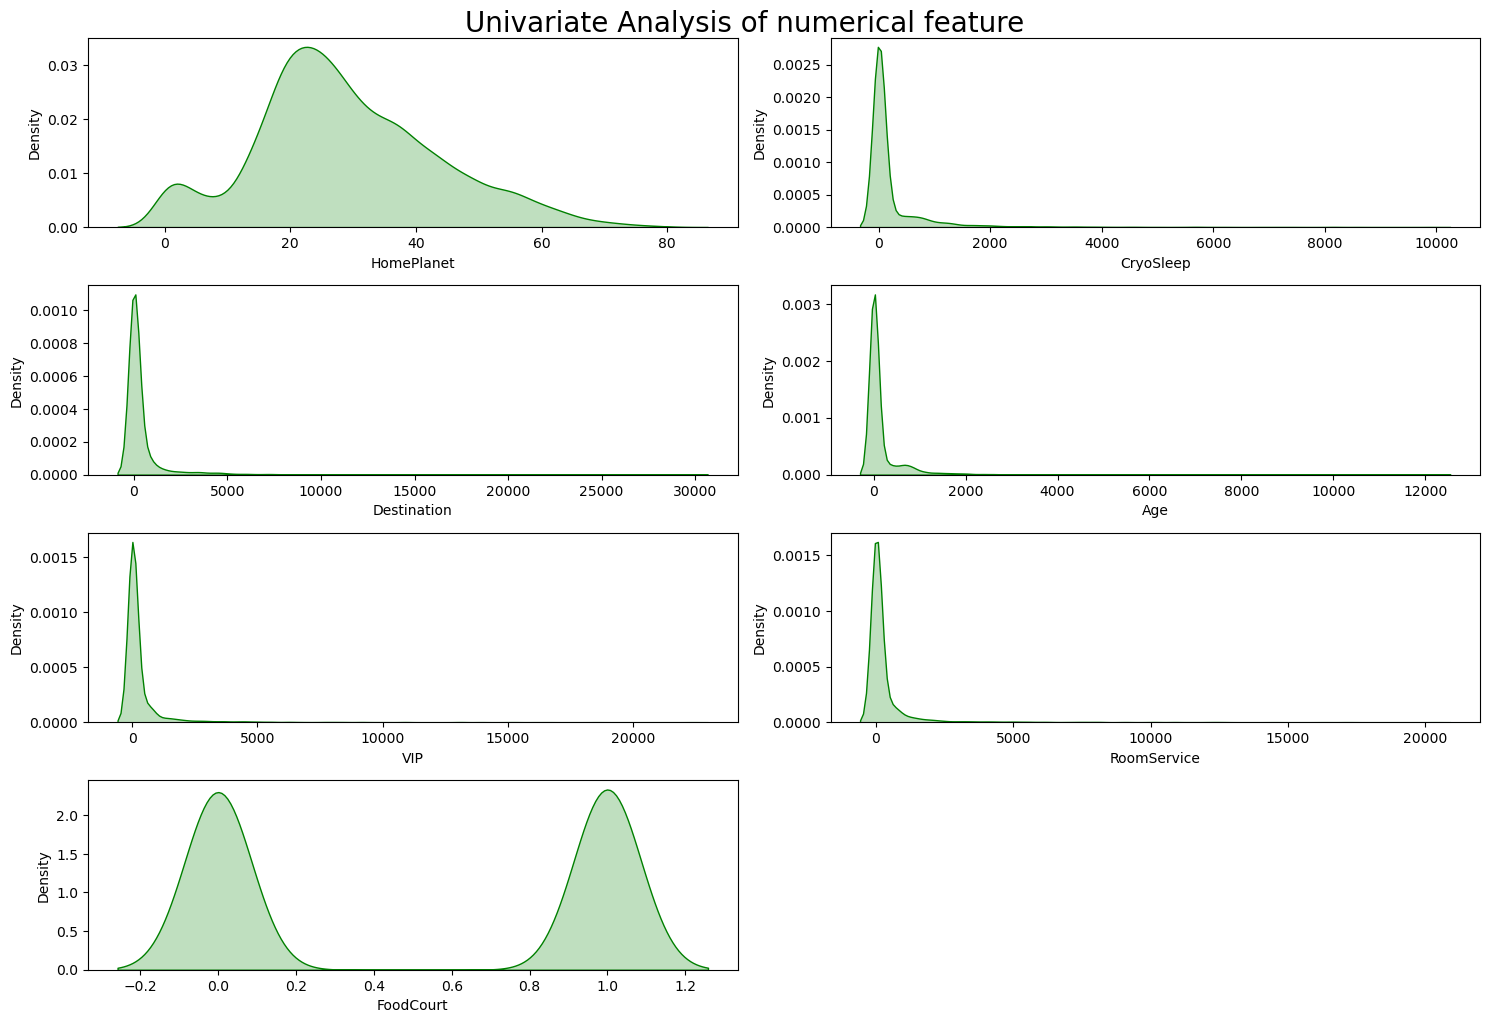

In [16]:
plt.figure(figsize=(15,15))
plt.suptitle('Univariate Analysis of numerical feature', fontsize=20, fontweight=10)

for i in range(0, len(numeric_feature)):
    plt.subplot(6,2,i+1)
    sns.kdeplot(x=df[numeric_feature[i]],shade=True, color='g')
    plt.xlabel(df.columns[i])
    plt.tight_layout()

### Categorical variables count plot

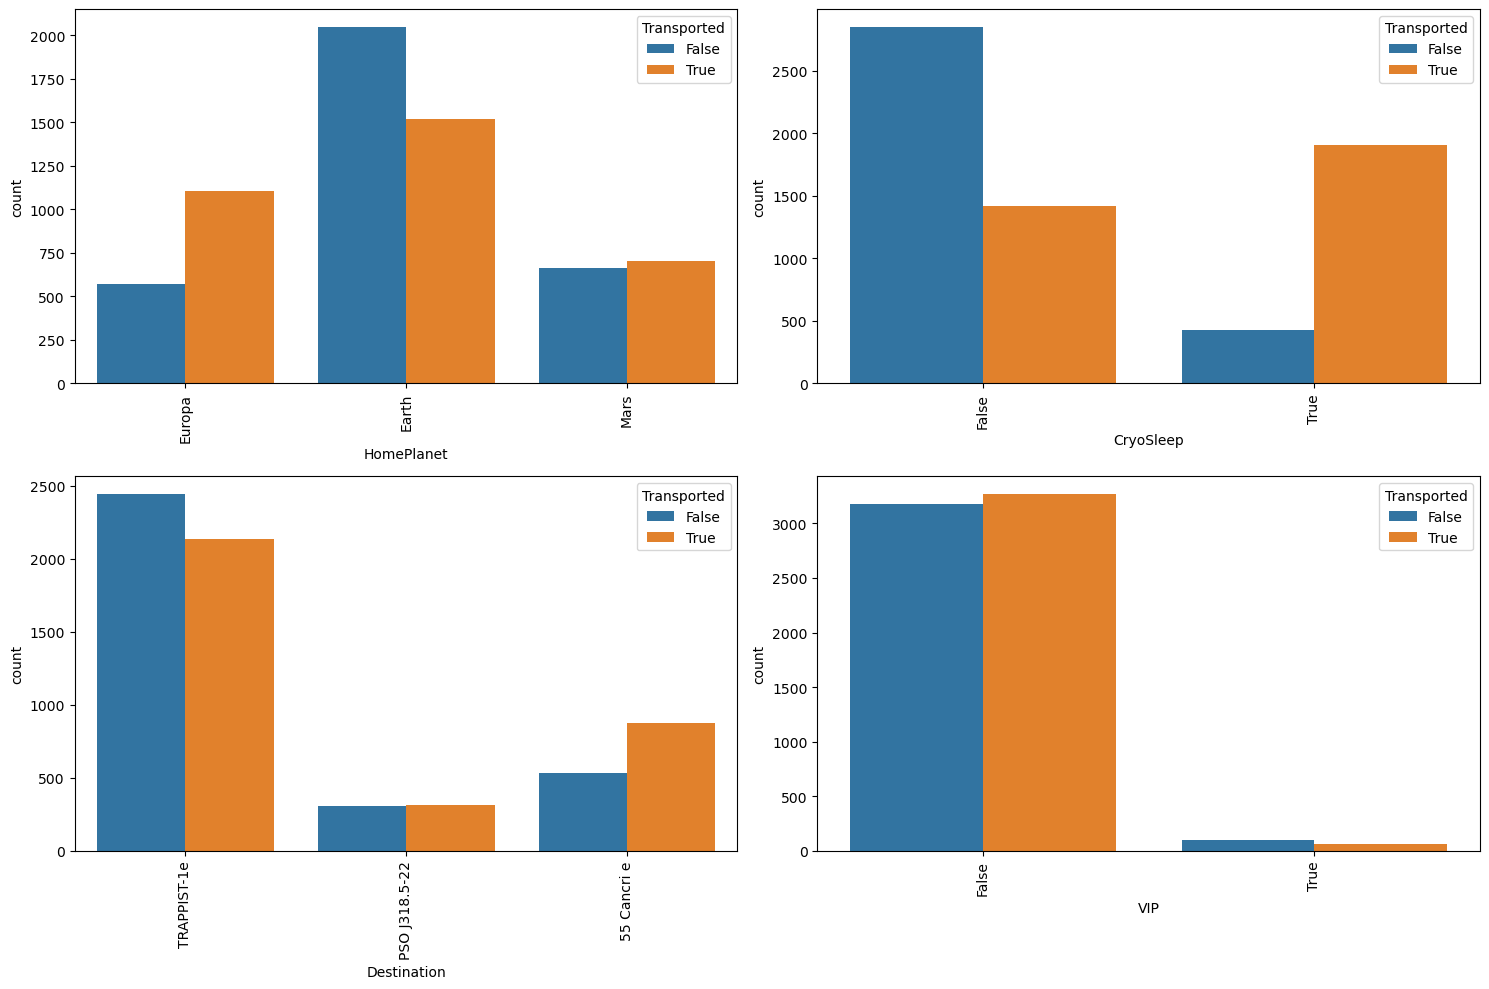

In [17]:
# list of categorical variables to plot
categorical_feature = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

# create barplot for each categorical variable
for i, var in enumerate(categorical_feature):
    sns.countplot(x=var, hue='Transported', data=df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

#### Report:
+  Homeplanet earth is major transport

+ we can't see the better visulzition in other categorical columns we need change there datatype

#### change the datatype

In [18]:
# convert boolean values to strings the 'Transported ' columns


df['CryoSleep'] = df['CryoSleep'].astype(str)

df['VIP'] = df['VIP'].astype(str)

In [19]:
df.dtypes

HomePlanet       object
CryoSleep        object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported        bool
dtype: object

 ### HomePlanet columns........

Text(0.5, 1.0, 'HomePlanet Distribution')

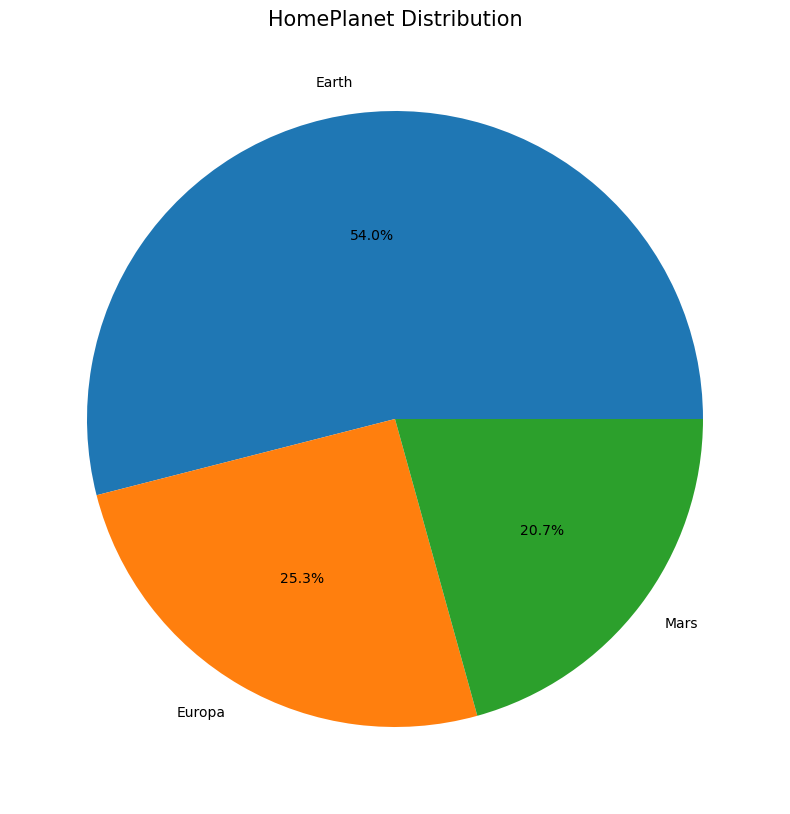

In [20]:
plt.figure(figsize=(20,10))
df.value_counts('HomePlanet').plot(kind='pie',autopct = '%1.1f%%')
plt.title("HomePlanet Distribution" , fontsize = 15)

#### Report :
+  Earth is 54 percent Transport distribution.


### CryoSleep columns..........

Text(0.5, 1.0, 'CryoSleep Distribution')

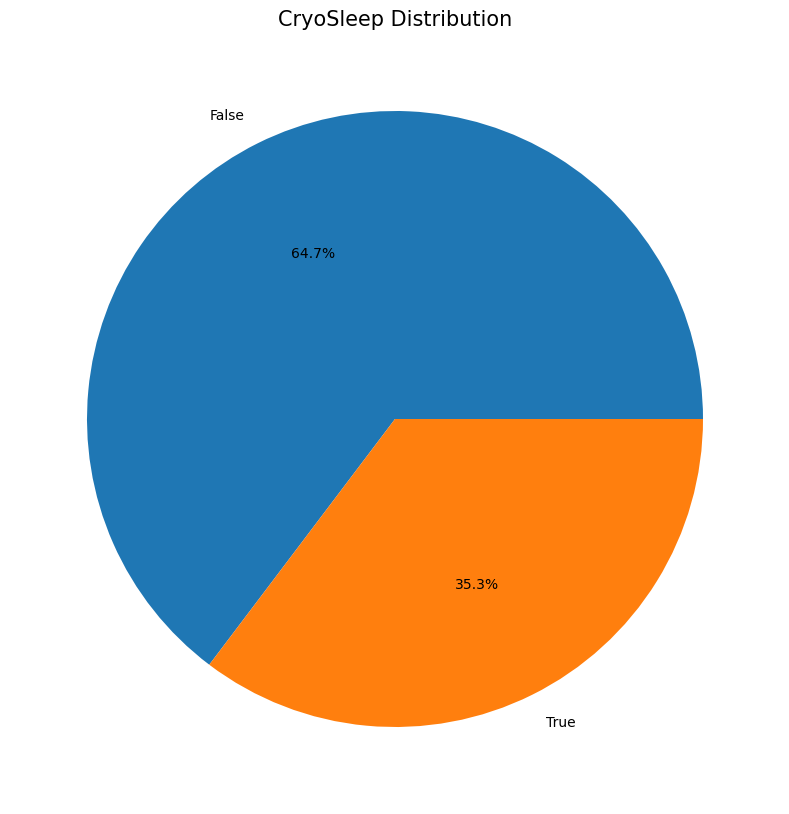

In [21]:
plt.figure(figsize=(15,10))
df.value_counts('CryoSleep').plot(kind='pie',autopct='%1.1f%%')
plt.title("CryoSleep Distribution",fontsize = 15)

#### Report :
+ In CryoSleep 35 percent True and 64 percent False Trasported.

#### Destination columns............

Text(0.5, 1.0, 'Destination Distribution')

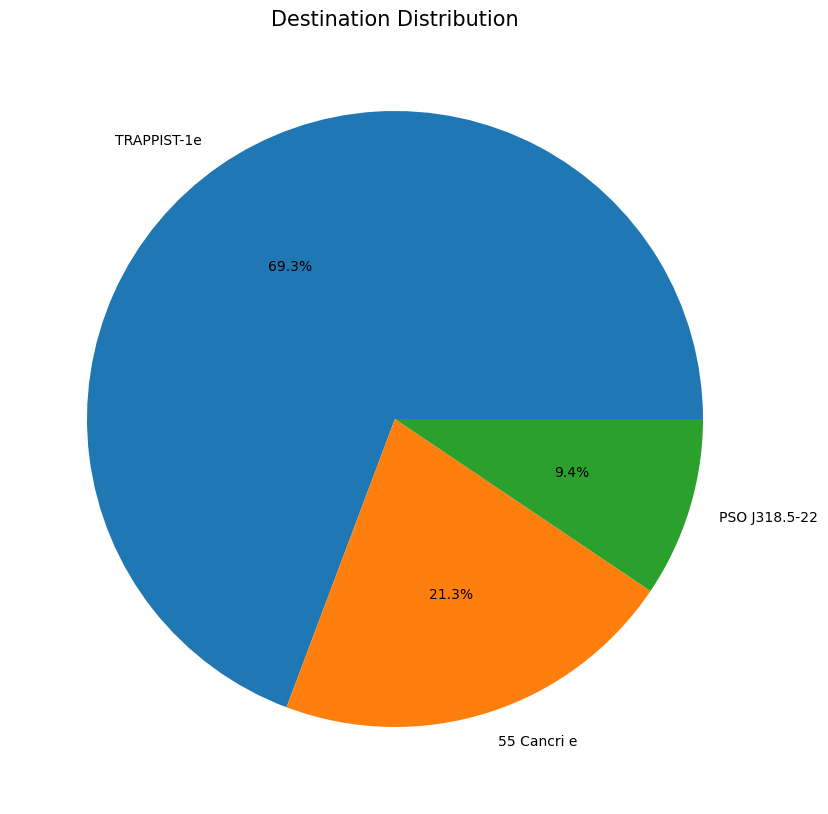

In [22]:
plt.figure(figsize=(15,10))
df.value_counts('Destination').plot(kind='pie',autopct='%1.1f%%')
plt.title("Destination Distribution",fontsize = 15)

#### Report :

+ major in TRAPPIST-1e

#### VIP columns...........

Text(0.5, 1.0, 'VIP Distribution')

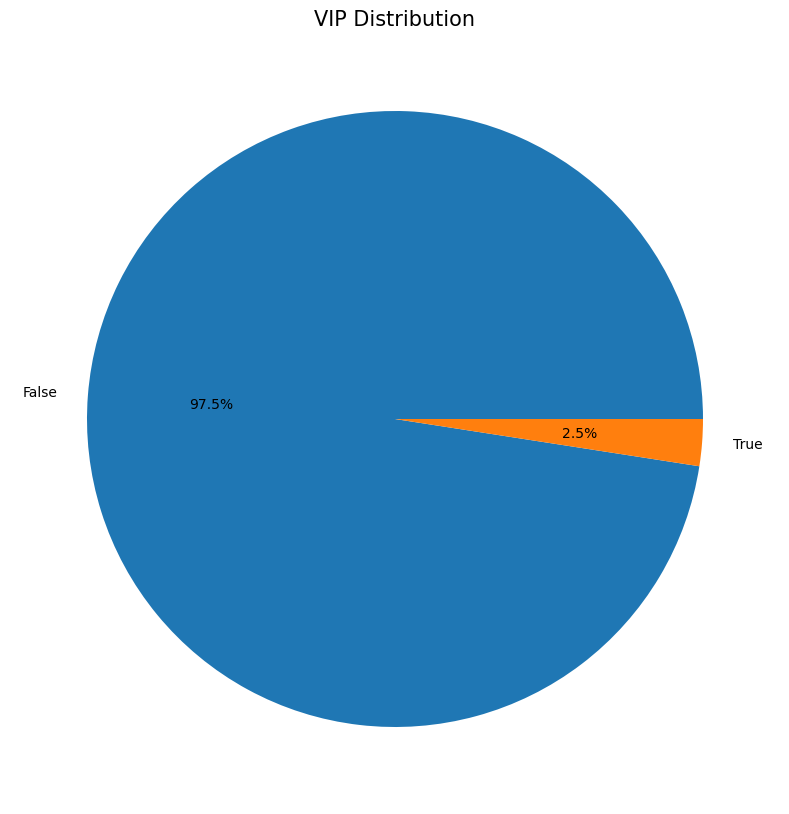

In [23]:
plt.figure(figsize=(15,10))
df.value_counts('VIP').plot(kind='pie',autopct='%1.1f%%')
plt.title("VIP Distribution",fontsize = 15)

#### Report :
 + 2 percent True Transported.

In [24]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


#### Seaborn plot

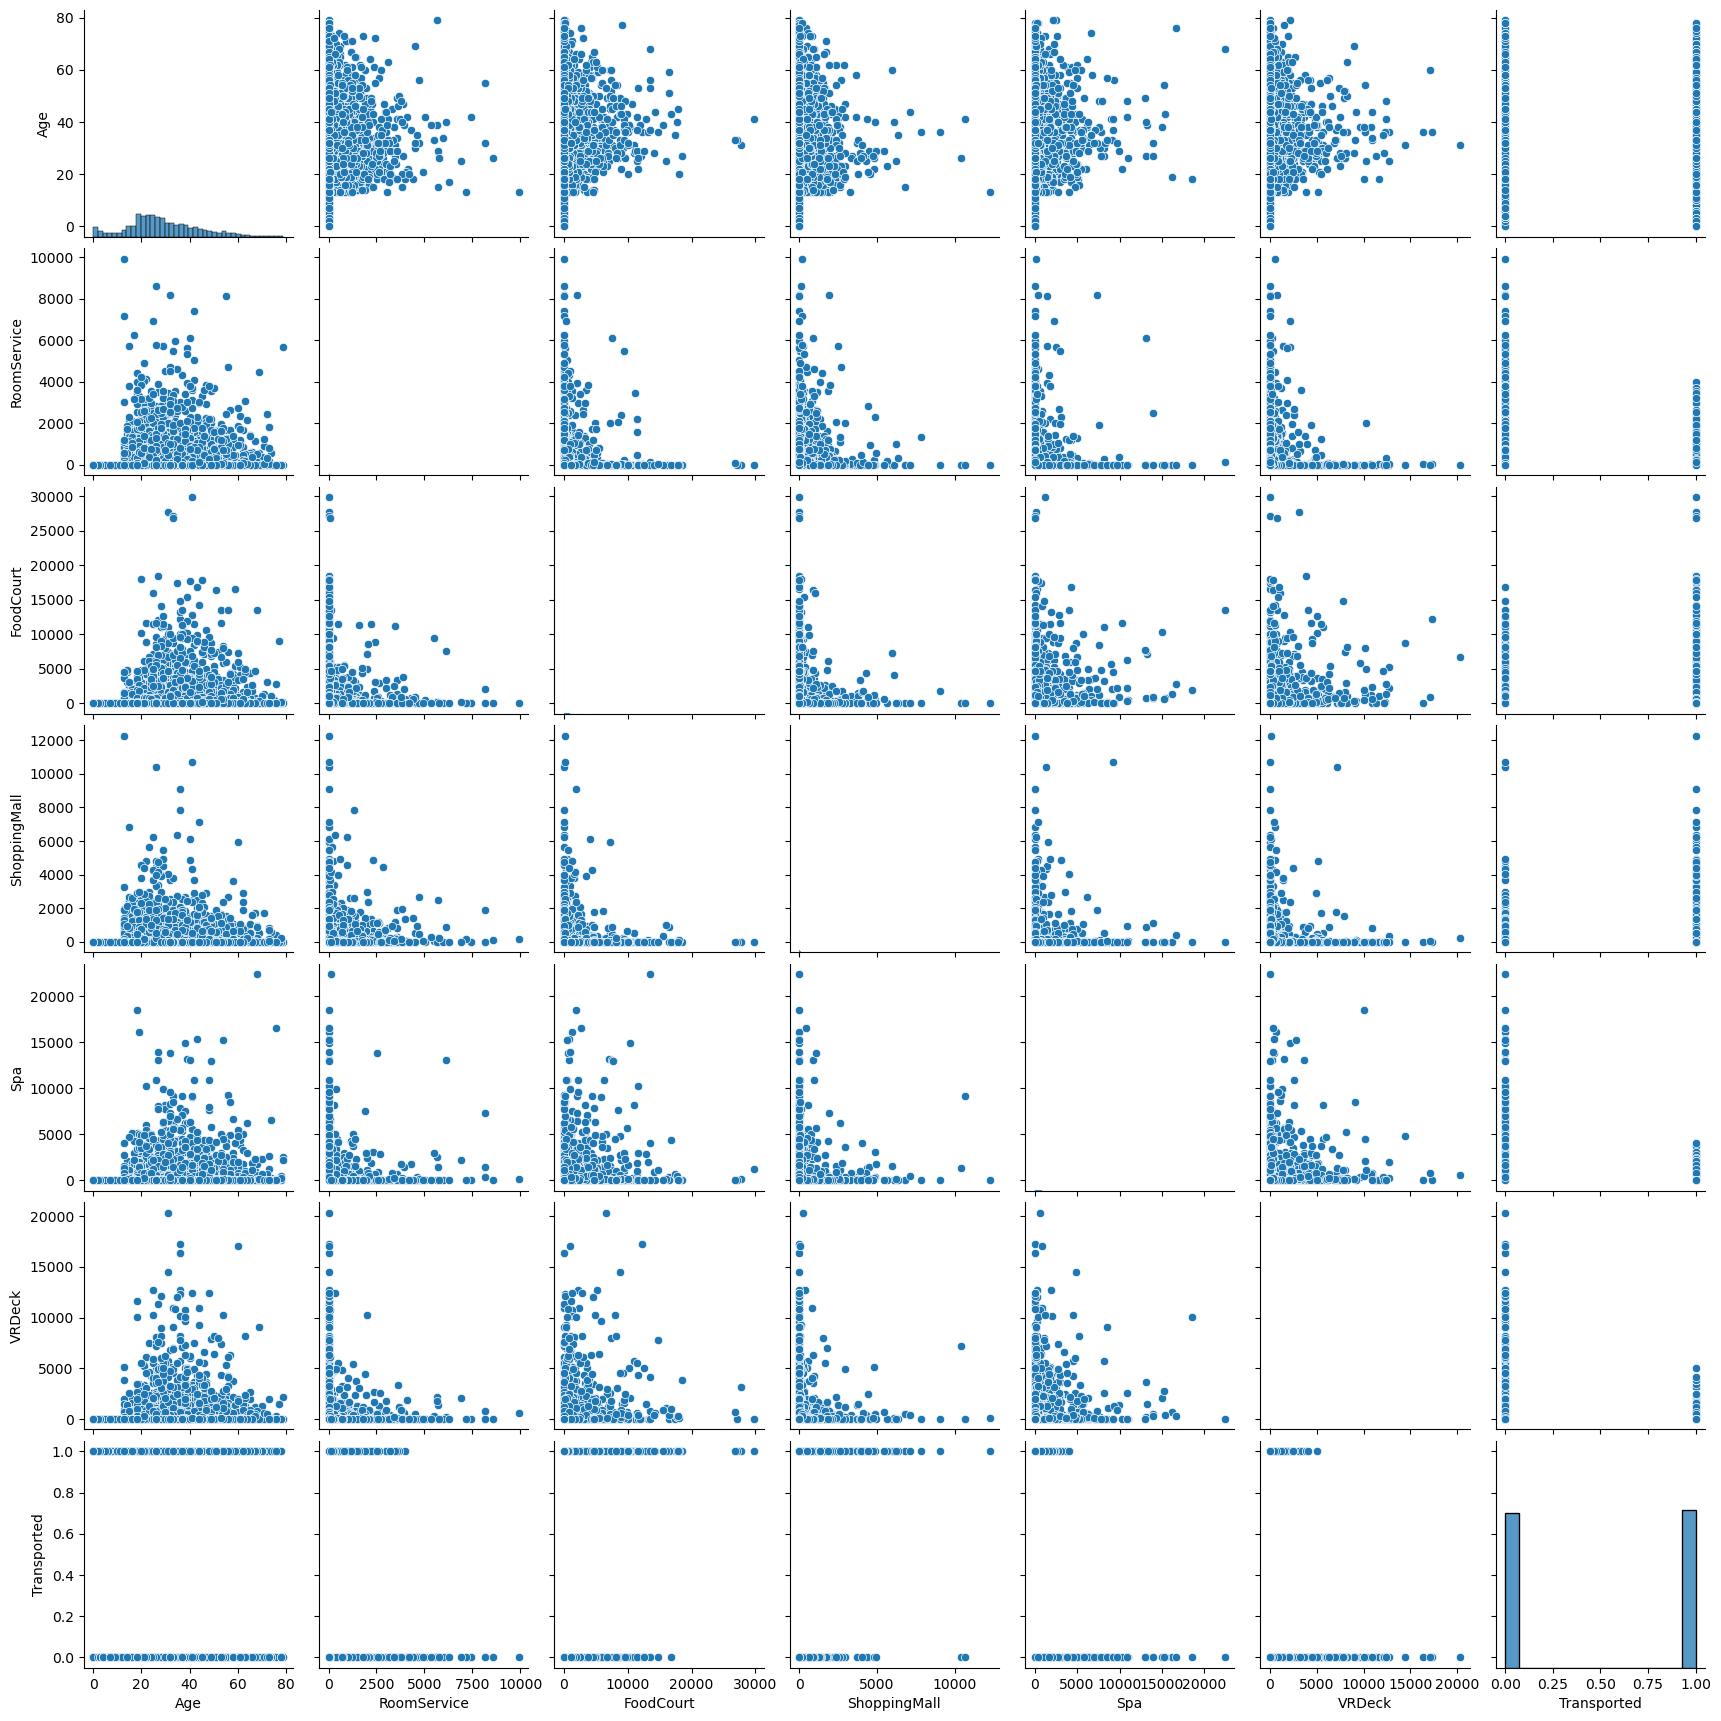

In [25]:
sns.pairplot(df)

### Ploting relationship between Independent and target variables

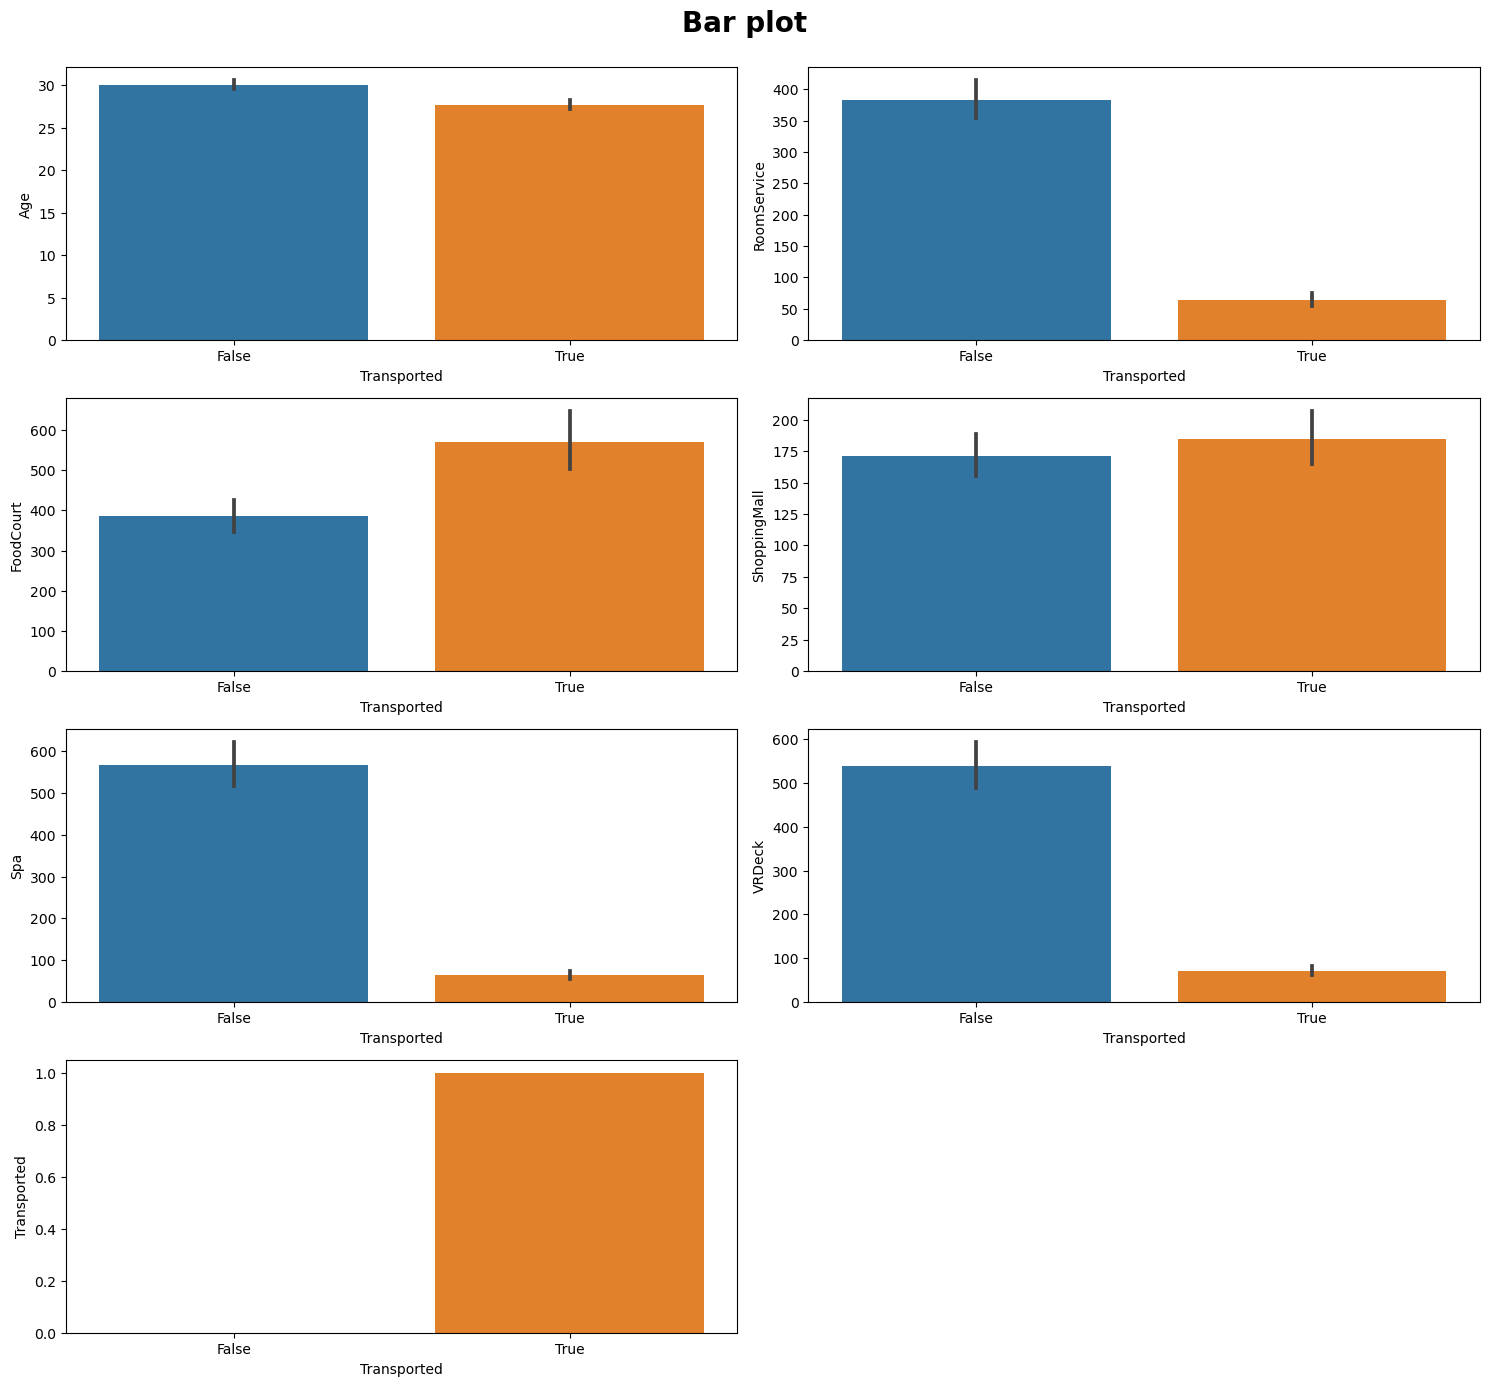

In [26]:
plt.figure(figsize=(15,20))
plt.suptitle('Bar plot', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(numeric_feature)):
    plt.subplot(6,2,i+1)
    sns.barplot(y=numeric_feature[i], x = 'Transported',data=df)
    plt.tight_layout()

## Data preprocessing

## checking the Outliers

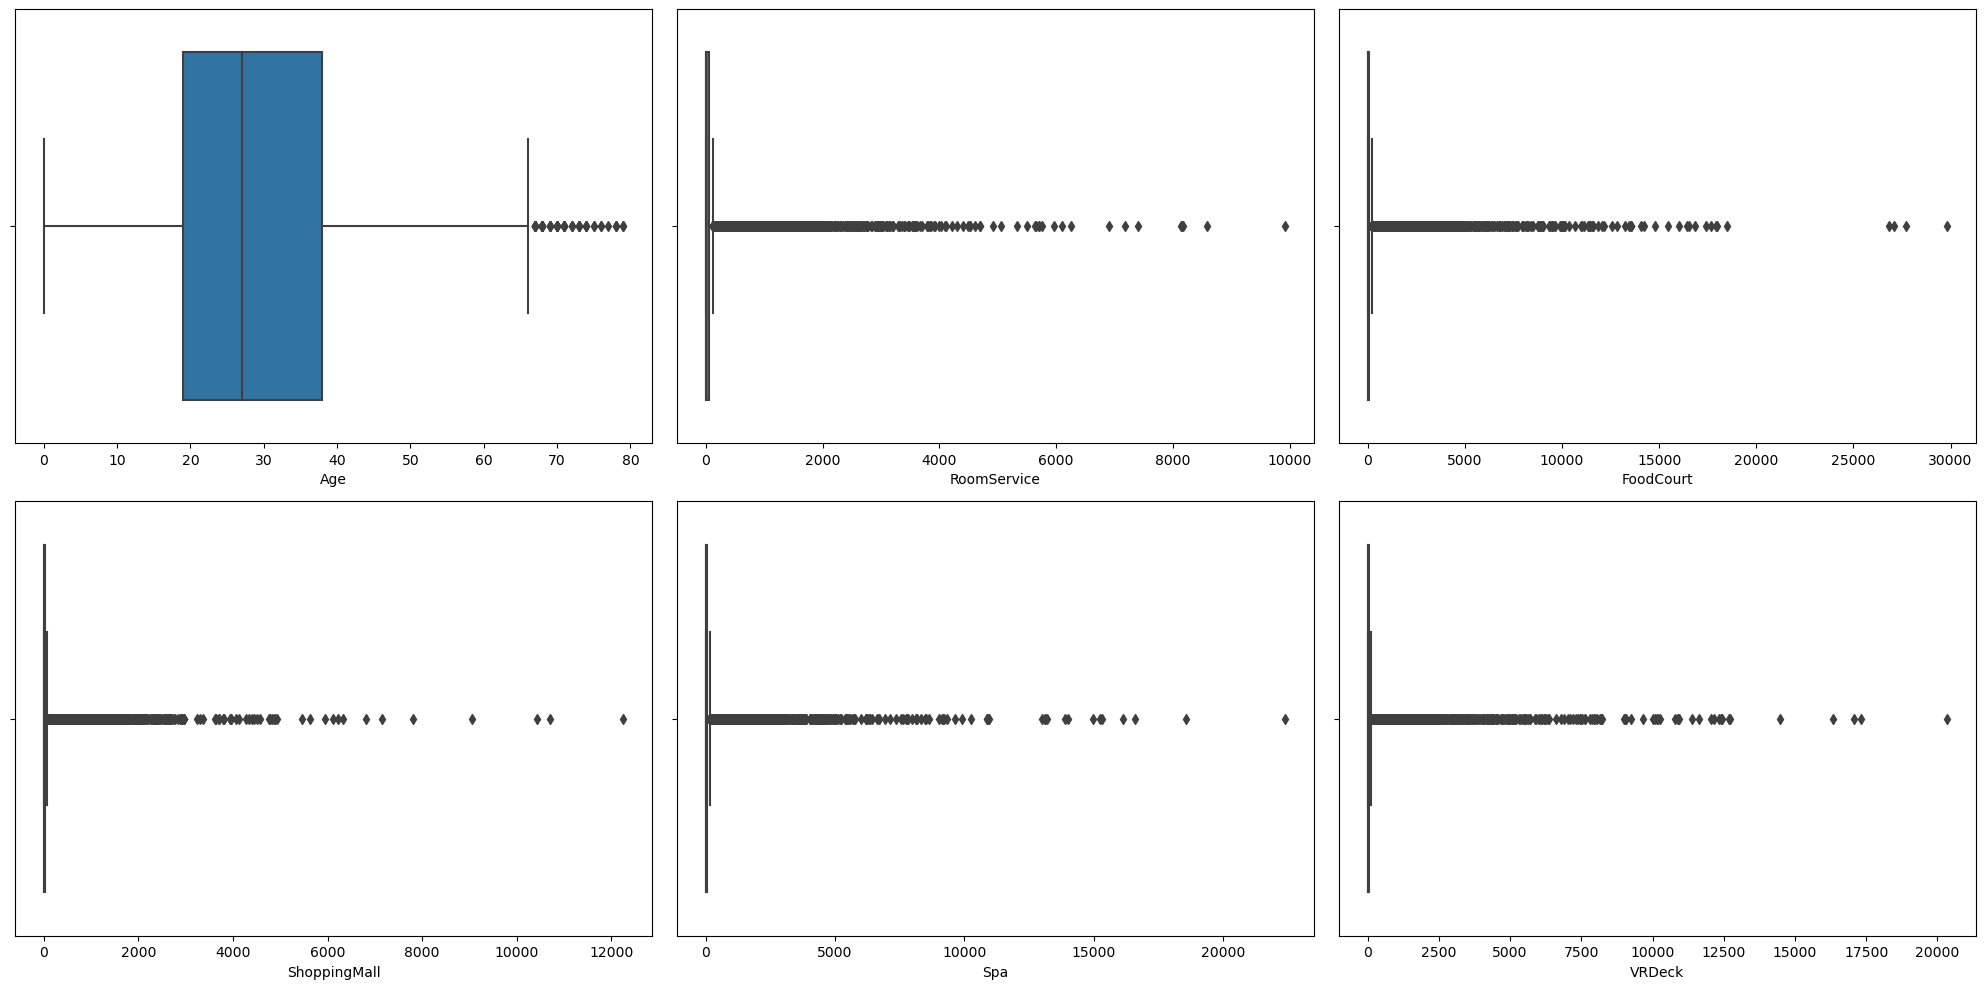

In [27]:
num_vars = ['Age', 'RoomService', 'FoodCourt', 
            'ShoppingMall','Spa','VRDeck']

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

### outlers relation with target variable

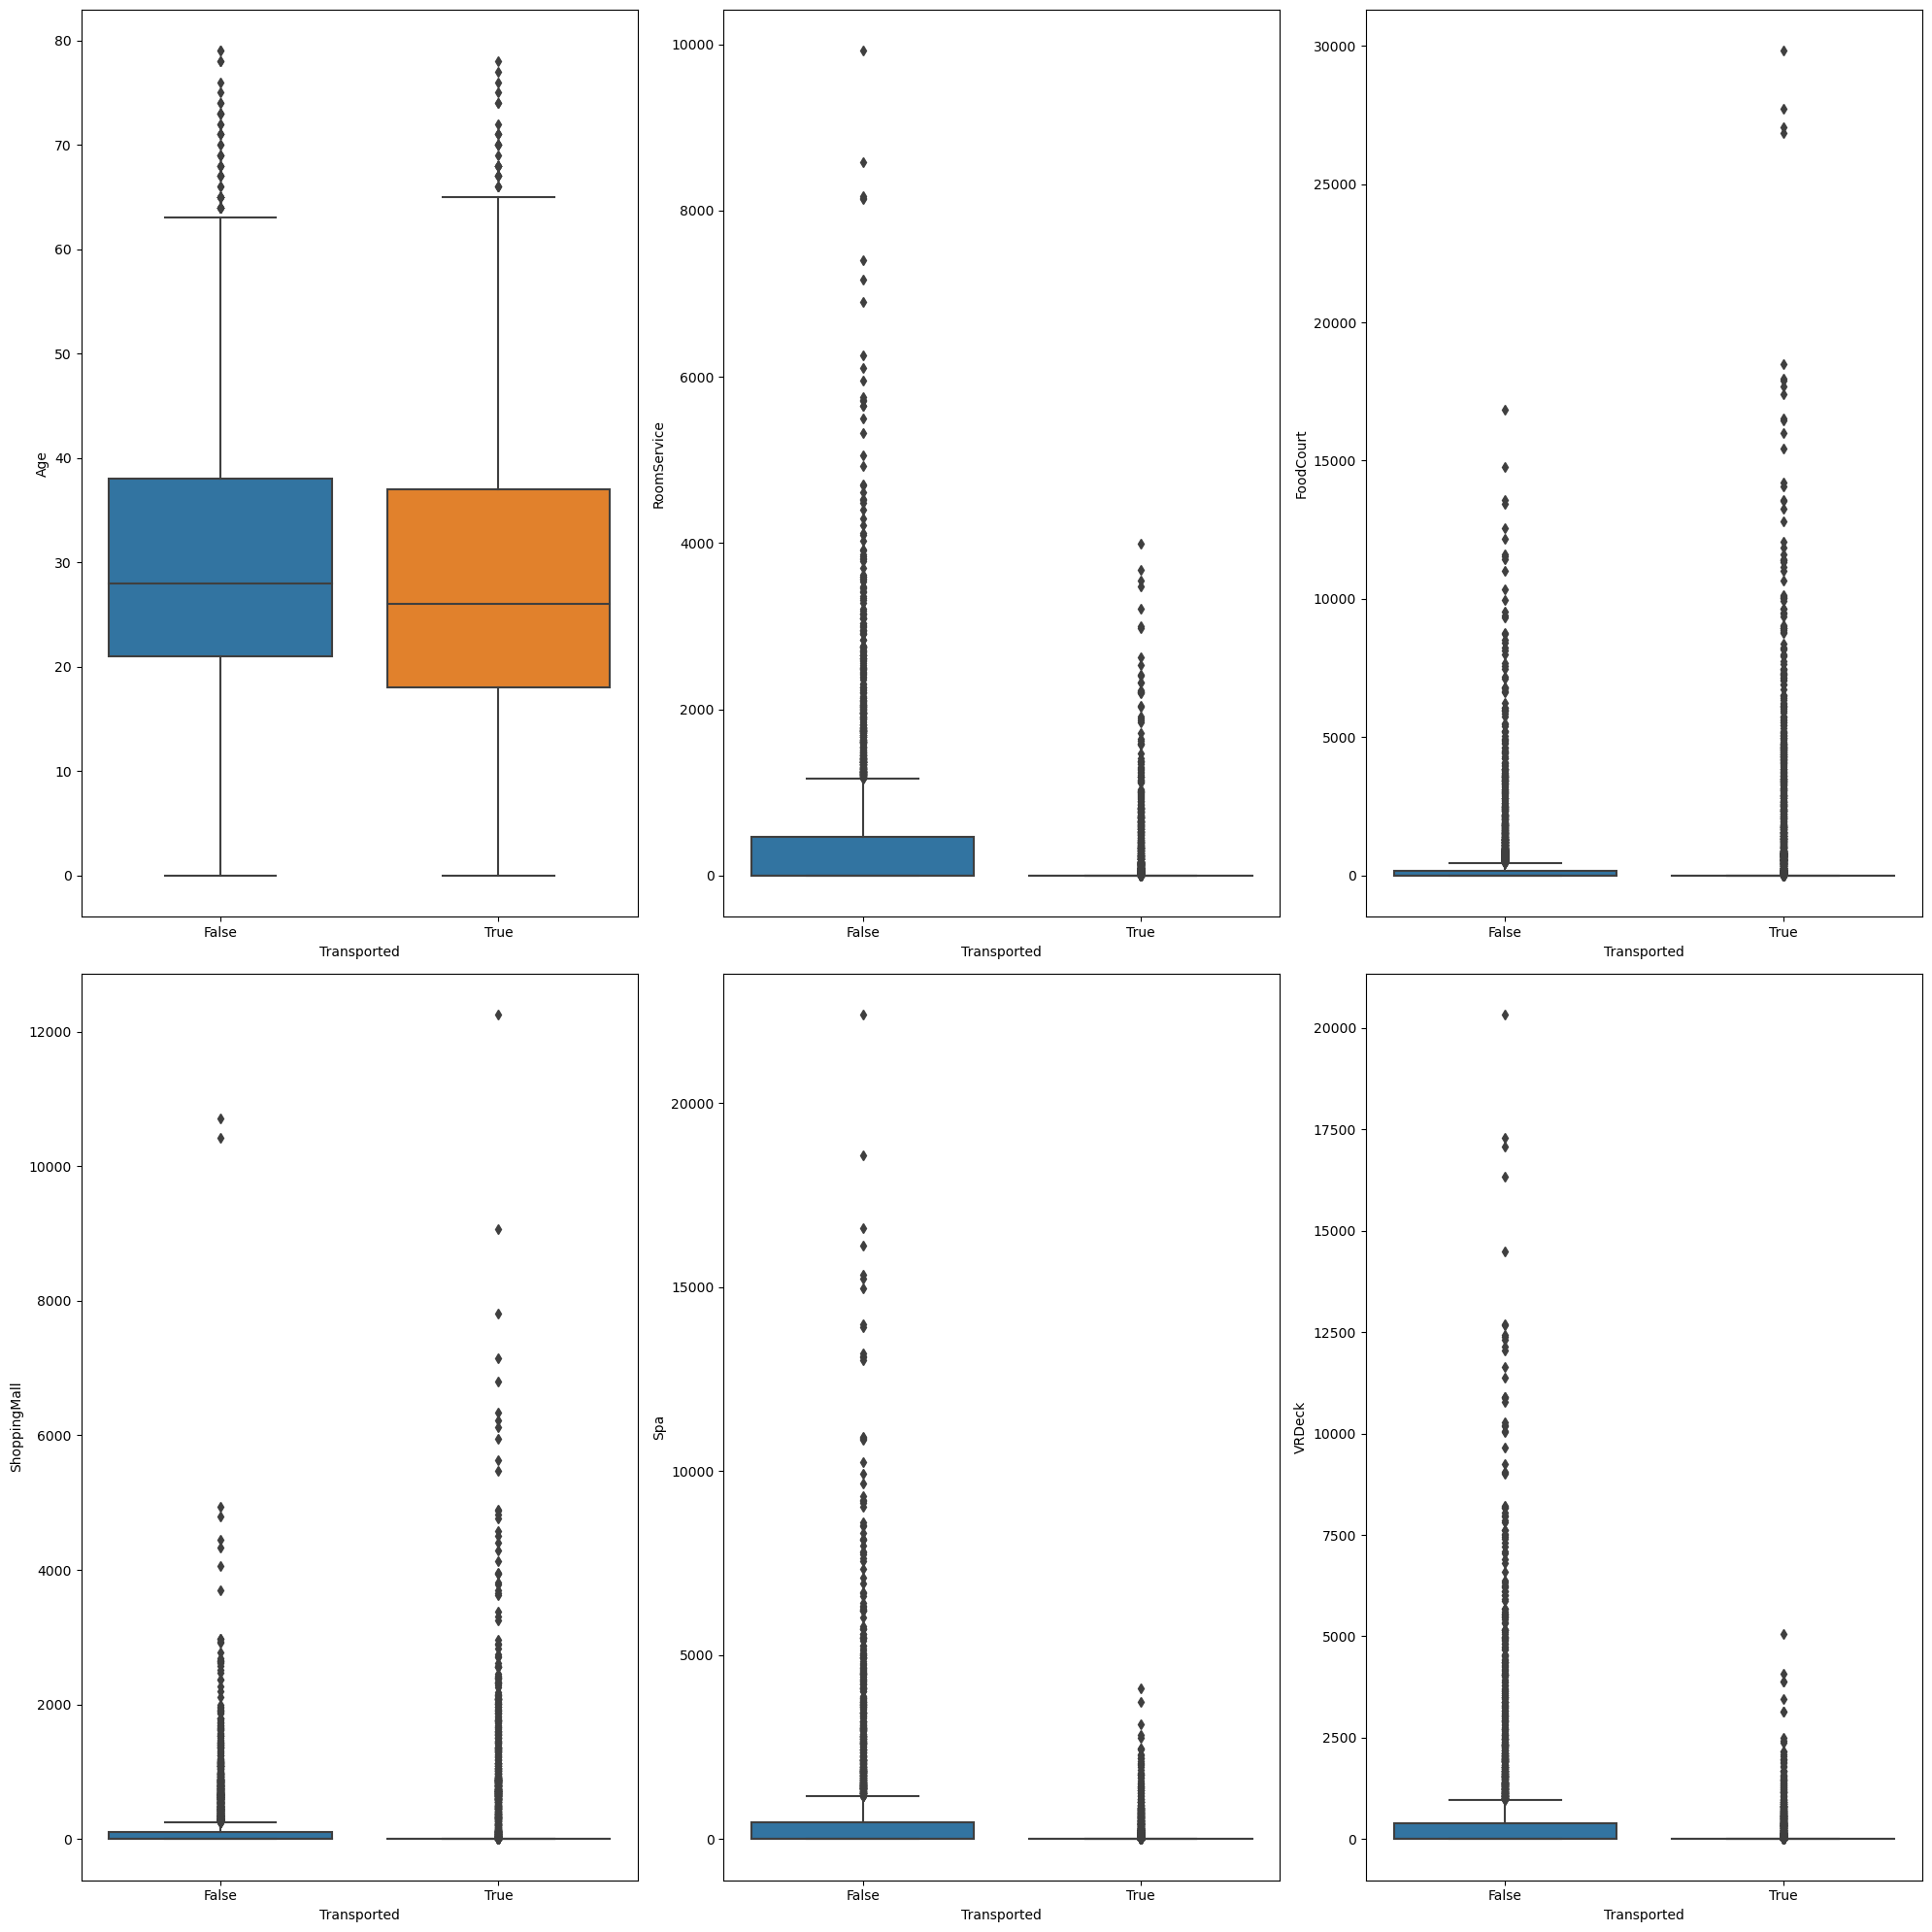

In [28]:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(y=var, x='Transported', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

### Result -->

+ We have lot of outliers in almost every feature . know we should remove the outliers

## Label Encoding for each Object datatype

In [29]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: ['False' 'True']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: ['False' 'True']


In [30]:
df['CryoSleep'] = df['CryoSleep'].replace('nan', np.nan)
df['VIP'] = df['VIP'].replace('nan', np.nan)
df.dropna(inplace=True)
df.shape

(6606, 11)

In [31]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

HomePlanet: ['Europa' 'Earth' 'Mars']
CryoSleep: ['False' 'True']
Destination: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP: ['False' 'True']


In [32]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:
    
    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()
    
    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())
    
    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])
    
    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

HomePlanet: [1 0 2]
CryoSleep: [0 1]
Destination: [2 1 0]
VIP: [0 1]


In [33]:
#plt.figure(figsize=(50,100))
#sns.boxplot(data=df,orient="v")

## Correlation Heatmap

<Axes: >

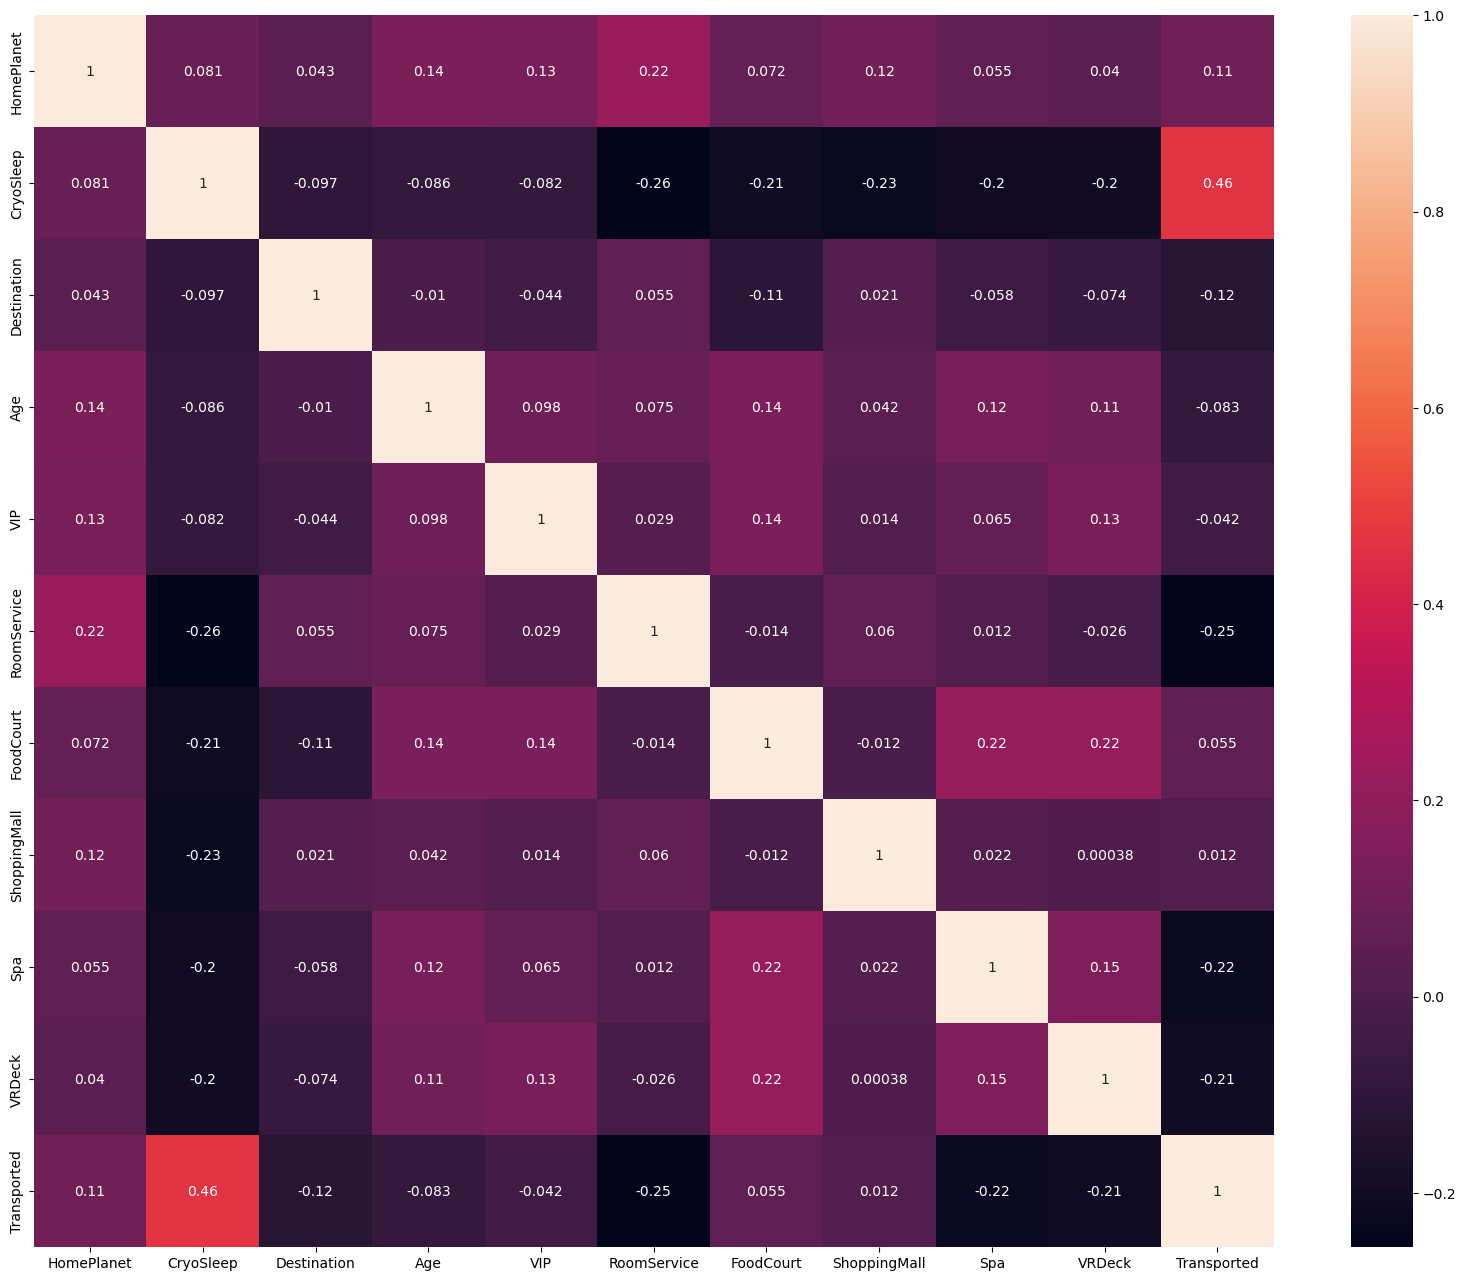

In [34]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

## checking multicollinearity

In [35]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#vif_data = pd.DataFrame()
#vif_data['vif'] = [variance_inflation_factor(df[numeric_feature].values,i) for i in range(len(numeric_feature))]
#vif_data['features'] = df[numeric_feature].columns
#vif_data

# Train Test Split

In [36]:
from sklearn.model_selection import train_test_split

# select the features (x) and the target variable (y)

X = df.drop('Transported', axis=1)
y = df['Transported']

# split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Remove the Outliers from train data using IQR

In [37]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['Age', 'RoomService', 'FoodCourt', 
                    'ShoppingMall','Spa','VRDeck']

# Calculate the IQR for the selected columns in the training data
Q1 = X_train[selected_columns].quantile(0.25)
Q3 = X_train[selected_columns].quantile(0.75)
IQR = Q3 - Q1

# Set a threshold value for outlier detection (e.g., 1.5 times the IQR)
threshold = 1.5

# Find the indices of outliers based on the threshold
outlier_indices = ((X_train[selected_columns] < (Q1 - threshold * IQR)) |
                   (X_train[selected_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Remove the outliers from the training data
X_train = X_train[~outlier_indices]
y_train = y_train[~outlier_indices]

In [38]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


## Model building

#### Import skelearn model 

In [39]:
from statistics import mean
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix


from sklearn import metrics 
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

warnings.filterwarnings("ignore")
%matplotlib inline

#### Create Functions for model training and evaluation

In [40]:
def evaluate_clf(true , predicted):
    '''
    This function in takes in true value and predicted value 
    Returns: Accuracy , F1_score , Precision , Recall , Roc-auc Score
    '''
    acc = accuracy_score(true , predicted) #calculated accuracy
    f1 = f1_score(true , predicted) #calculated f1_score
    precision = precision_score(true , predicted) #calculated Precision
    recall = recall_score(true , predicted) #calculated recall
    roc_auc = roc_auc_score(true , predicted) #calculated Roc
    return acc , f1 ,recall , precision ,roc_auc

 ##### Create a function which can evaluate models and return a report 

In [41]:
# Create a function which can evaluate models and return a report 

def evaluate_models(X, y, models):
    '''
    This function takes in X, y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''
    # separate dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    
    models_list = []
    accuracy_list = []
    
    for i in range(len(list(models))):
        model = list(models.values())[i]  # Iterting through each model 
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score = evaluate_clf(y_train ,y_train_pred)

        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        print('='*35)
        print('\n')
        
    report = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_Score']).sort_values(by=["Accuracy_Score"])
        
    return report

### Experiment: 1 = KNN Imputer for Null values
### Why KNN Imputer?
KNNImputer by scikit-learn is a widely used method to impute missing values. It is widely being observed as a replacement for traditional imputation techniques.

KNNImputer helps to impute missing values present in the observations by finding the nearest neighbors with the Euclidean distance matrix.

Here we Iterates through different K values and get accuracy and choose best K values.

In [42]:
results=[]
# define imputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
strategies = [str(i) for i in [1,3,5,7,9]]
for s in strategies:
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=2, n_jobs=-1)
    results.append(scores)
    print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

n_neighbors= 1 || accuracy (0.7841)
n_neighbors= 3 || accuracy (0.7841)
n_neighbors= 5 || accuracy (0.7841)
n_neighbors= 7 || accuracy (0.7841)
n_neighbors= 9 || accuracy (0.7841)


In [43]:
# Fit the KNN imputer with selected K-value

In [44]:
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3))])

In [45]:
X_knn = knn_pipeline.fit_transform(X)

### Handling Imbalanced data
- **SMOTE+TOMEK** is one of such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space.

- .This method combines the SMOTE ability to generate synthetic data for minority class and Tomek Links ability to remove the data that are identified as Tomek links from the majority class

- . To add new data of minority class

 1.Choose random data from the minority class.
 
 2.Calculate the distance between the random data and its k nearest neighbors.
 
 3.Multiply the difference with a random number between 0 and 1, then add the result to the minority class as a synthetic sample.
 
 4.Repeat step number 2–3 until the desired proportion of minority class is met.
 
- To remove the tomek links of the majority class
 1.Choose random data from the majority class.
 
 2.If the random data’s nearest neighbor is the data from the minority class (i.e. create the Tomek Link), then remove the Tomek Link.
 
- This is method instead of adding duplicate data it synthesises the new data based on the already avalialble classes. Hence we choose this as our imputer method for this problem.

In [46]:
from imblearn.combine import SMOTETomek

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTETomek(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_knn, y)

In [47]:
len(X), len(y), len(X_res), len(y_res)

(6606, 6606, 6184, 6184)

In [48]:
df_smote= pd.DataFrame(y_res)

In [49]:
df_smote['Transported'].value_counts()

True     3092
False    3092
Name: Transported, dtype: int64

In [50]:
 #Dictionary which contains models for experiment
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [51]:
report_knn = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9327
- F1 score: 0.9348
- Precision: 0.9680
- Recall: 0.9038
- Roc Auc Score: 0.9328
----------------------------------
Model performance for Test set
- Accuracy: 0.8189
- F1 score: 0.8185
- Precision: 0.8054
- Recall: 0.8320
- Roc Auc Score: 0.8191


Decision Tree
Model performance for Training set
- Accuracy: 0.9327
- F1 score: 0.9343
- Precision: 0.9598
- Recall: 0.9100
- Roc Auc Score: 0.9328
----------------------------------
Model performance for Test set
- Accuracy: 0.7809
- F1 score: 0.7830
- Precision: 0.7799
- Recall: 0.7862
- Roc Auc Score: 0.7809


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8401
- F1 score: 0.8483
- Precision: 0.8970
- Recall: 0.8046
- Roc Auc Score: 0.8403
----------------------------------
Model performance for Test set
- Accuracy: 0.8286
- F1 score: 0.8406
- Precision: 0.8915
- Recall: 0.7952
- Roc Auc Score: 0.8277


Logistic Regression
Model performance for Training 

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=[False  True] and y_pred=['False' 'True']. Make sure that the predictions provided by the classifier coincides with the true labels.

### Insights

+ For the Experiment 1: Knn imputer, has Random Forest Classifier and Decision Tree as the best Model+

+ Proceeding with two final model

### Final model

## Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


In [53]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=5, min_samples_leaf=3, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=3,
                       random_state=0)

In [54]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 69.52 %


## Model Evaluation

In [55]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.6951588502269289
Precision Score :  0.6951588502269289
Recall Score :  0.6951588502269289
Log Loss :  10.987588741160522


#### Roc curve decision Tree

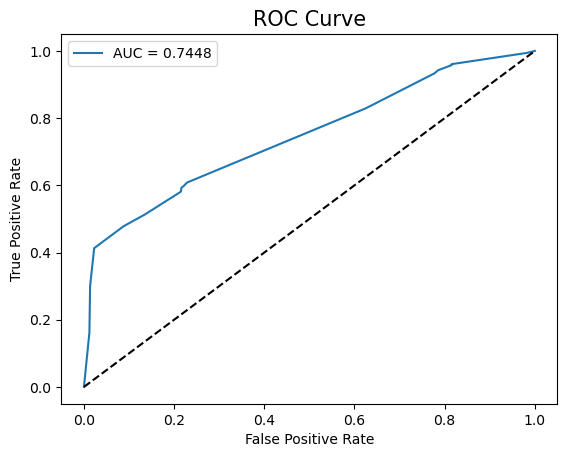

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#### confusion_matrix

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.6951588502269289')

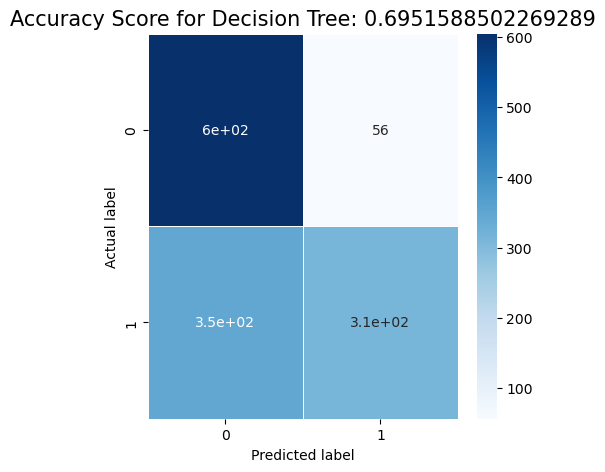

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

### Final model

## Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': None, 'n_estimators': 200, 'random_state': 42}


In [59]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_features= None, n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features=None,
                       random_state=42)

In [60]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 64.3 %


### Model evaluation

In [61]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.642965204236006
Precision Score :  0.642965204236006
Recall Score :  0.642965204236006
Log Loss :  12.86883842637163


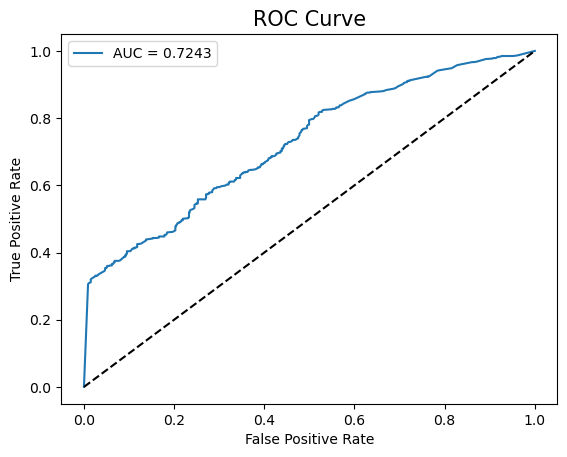

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

#### confusion_matrix

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.642965204236006')

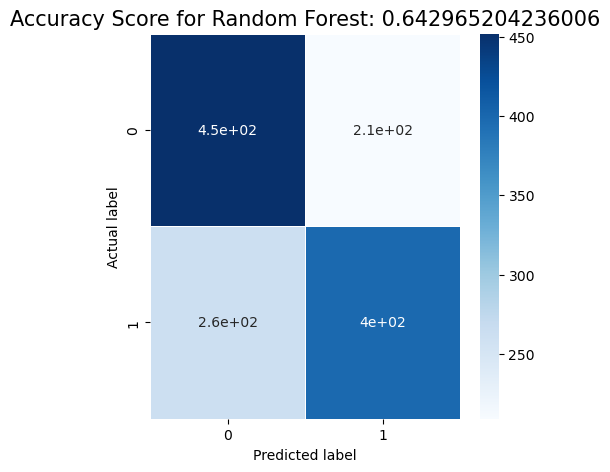

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

### Decision Tree as the best Model which given Accuracy Score for Decision Tree: 0.6951588502269289

##### Thank you ###